# Movie Rating Prediction Using Regression

This project predicts IMDB ratings for Indian movies using machine learning regression models.  
We use features such as Genre, Year, Duration, Director, and Actors.

## Objective:
Build a model to estimate movie ratings based on metadata.

## Techniques Used:
- Data Cleaning & Preprocessing
- One-Hot Encoding
- Linear Regression
- Decision Tree Regression
- RMSE & MAE evaluation


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("imdb_movies.csv",encoding = "latin1")

In [58]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [60]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [61]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [62]:
df.duplicated().sum()

6

In [63]:
df_clean = df.dropna(subset = ['Rating']).copy()

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [65]:
df_clean['Year'] = df_clean['Year'].str.extract(r'(\d{4})')
df_clean['Year'] = df_clean['Year'].astype(float)


In [66]:
print(df_clean['Year'].head(10))


1     2019.0
3     2019.0
5     1997.0
6     2005.0
8     2012.0
9     2014.0
10    2004.0
11    2016.0
12    1991.0
13    2012.0
Name: Year, dtype: float64


In [67]:
df_clean['Duration'] = df_clean['Duration'].str.replace('min','')
df_clean['Duration'] = pd.to_numeric(df_clean['Duration'],errors='coerce')

In [68]:
print(df_clean['Duration'].head(10))

1     109.0
3     110.0
5     147.0
6     142.0
8      82.0
9     116.0
10     96.0
11    120.0
12    161.0
13    166.0
Name: Duration, dtype: float64


In [69]:
df_clean['Votes'] = df_clean['Votes'].str.replace(',','')
df_clean['Votes'] = pd.to_numeric(df_clean['Votes'],errors='coerce')

In [70]:
print(df_clean['Votes'].head(10))

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
Name: Votes, dtype: int64


In [71]:
df_clean['Year'] = df_clean['Year'].fillna(df_clean['Year'].median())
df_clean['Duration'] = df_clean['Duration'].fillna(df_clean['Duration'].median())
df_clean['Votes'] = df_clean['Votes'].fillna(df_clean['Votes'].median())


In [72]:
print(df_clean.isnull().sum())

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64


In [73]:
df_clean['Year'] = df_clean['Year'].fillna(df_clean['Year'].median())
df_clean['Duration'] = df_clean['Duration'].fillna(df_clean['Duration'].median())
df_clean['Votes'] = df_clean['Votes'].fillna(df_clean['Votes'].median())

df_clean['Director'] = df_clean['Director'].fillna('Unknown')
df_clean['Actor 1'] = df_clean['Actor 1'].fillna('Unknown')
df_clean['Actor 2'] = df_clean['Actor 2'].fillna('Unknown')
df_clean['Actor 3'] = df_clean['Actor 3'].fillna('Unknown')
df_clean['Genre'] = df_clean['Genre'].fillna('Unknown')


In [74]:
print(df_clean.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [75]:
df_clean['Genre'] = df_clean['Genre'].fillna("Unknown")
df_clean['Main_Genre'] = df_clean['Genre'].apply(lambda x: x.split(',')[0])


In [76]:
print(df_clean['Main_Genre'].value_counts())


Main_Genre
Drama          2532
Action         2306
Comedy         1190
Crime           343
Romance         279
Horror          188
Adventure       160
Documentary     143
Thriller        138
Musical         121
Unknown         102
Biography        99
Family           85
Mystery          77
Animation        73
Fantasy          52
History          15
Sci-Fi            6
Music             5
War               3
Sport             2
Name: count, dtype: int64


In [77]:
genre_dummies = pd.get_dummies(df_clean['Main_Genre'], prefix='Genre')
print(genre_dummies.head())


   Genre_Action  Genre_Adventure  Genre_Animation  Genre_Biography  \
1         False            False            False            False   
3         False            False            False            False   
5         False            False            False            False   
6         False            False            False            False   
8         False            False            False            False   

   Genre_Comedy  Genre_Crime  Genre_Documentary  Genre_Drama  Genre_Family  \
1         False        False              False         True         False   
3          True        False              False        False         False   
5          True        False              False        False         False   
6         False        False              False         True         False   
8         False        False              False        False         False   

   Genre_Fantasy  ...  Genre_Horror  Genre_Music  Genre_Musical  \
1          False  ...         False        

In [78]:
top_directors = df_clean['Director'].value_counts().nlargest(10).index
df_clean['Director_simple'] = df_clean['Director'].apply(lambda x: x if x in top_directors else 'Other')
director_dummies = pd.get_dummies(df_clean['Director_simple'], prefix='Director')
print(director_dummies.head())


   Director_Basu Chatterjee  Director_David Dhawan  \
1                     False                  False   
3                     False                  False   
5                     False                  False   
6                     False                  False   
8                     False                  False   

   Director_Hrishikesh Mukherjee  Director_Kanti Shah  Director_Mahesh Bhatt  \
1                          False                False                  False   
3                          False                False                  False   
5                          False                False                  False   
6                          False                False                  False   
8                          False                False                  False   

   Director_Other  Director_Ram Gopal Varma  Director_Rama Rao Tatineni  \
1            True                     False                       False   
3            True                     False 

In [79]:
top_actors1 = df_clean['Actor 1'].value_counts().nlargest(10).index
df_clean['Actor1_simple'] = df_clean['Actor 1'].apply(lambda x: x if x in top_actors1 else 'Other')
actor1_dummies = pd.get_dummies(df_clean['Actor1_simple'], prefix='Actor1')
print(actor1_dummies.head())


   Actor1_Akshay Kumar  Actor1_Amitabh Bachchan  Actor1_Ashok Kumar  \
1                False                    False               False   
3                False                    False               False   
5                False                    False               False   
6                False                    False               False   
8                False                    False               False   

   Actor1_Dev Anand  Actor1_Dharmendra  Actor1_Jeetendra  \
1             False              False             False   
3             False              False             False   
5             False              False             False   
6             False              False             False   
8             False              False             False   

   Actor1_Mithun Chakraborty  Actor1_Other  Actor1_Rajesh Khanna  \
1                      False          True                 False   
3                      False          True                 False   
5       

In [80]:
X = pd.concat([
    df_clean[['Year', 'Duration', 'Votes']], 
    genre_dummies,
    director_dummies,
    actor1_dummies
], axis=1)
y = df_clean['Rating']
print(X.shape)
print(y.shape)


(7919, 46)
(7919,)


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6335, 46)
(1584, 46)
(6335,)
(1584,)


In [82]:
 from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-1.22301804e-02 -1.44338978e-03  1.83661950e-05 -4.75893140e-01
 -1.95833549e-01  1.98697835e-01  6.42324623e-01 -1.36617697e-01
  1.36892461e-01  1.82545282e+00  1.30577834e-01  4.28984087e-02
  2.12401736e-01  3.82782229e-01 -1.20700462e+00  8.81449098e-01
 -1.51841995e-01 -1.99994857e-01 -3.81016725e-01  9.94378698e-01
  1.75982586e-01 -4.08438144e-01 -3.26191295e-01 -2.14100631e+00
  5.03368942e-01 -3.44319395e-01  9.04505933e-01 -1.36752888e-01
 -3.45749677e-01  8.25589941e-02 -6.13295973e-02 -1.73654995e-01
  5.79797415e-01 -4.05597090e-01 -6.02827642e-01 -1.69030364e-01
  2.81925941e-01  1.18004279e-01  5.52756124e-01 -4.97107398e-02
 -6.35709404e-01 -4.17181338e-01 -7.68435201e-02  2.60764422e-01
  2.31061117e-01 -9.60365159e-02]
Intercept: 30.48384130624645


In [83]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[5.56494675 5.04636591 5.1734965  5.94566068 4.4484904  5.3224298
 5.85848693 6.03977449 6.40673781 5.95436996]


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 1.229855513299148
MAE: 0.9698256558645817


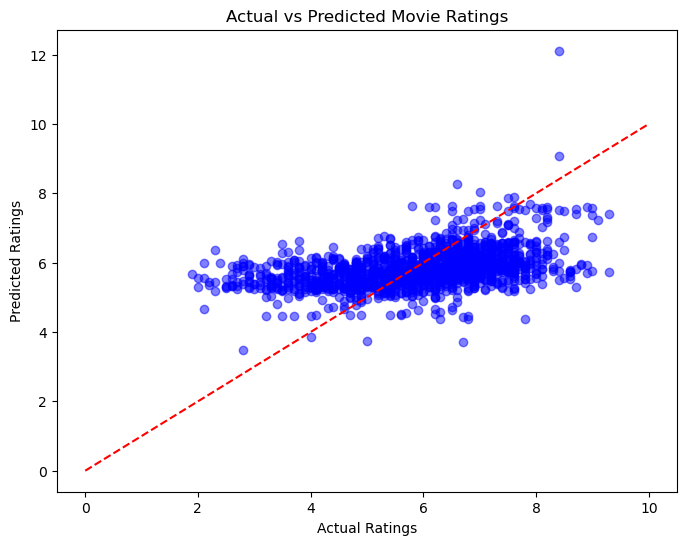

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.plot([0,10],[0,10], color="red", linestyle="--")  # reference line
plt.show()


In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("Tree RMSE:", rmse_tree)
print("Tree MAE:", mae_tree)


Tree RMSE: 1.5363021348155554
Tree MAE: 1.160023148148148


## Model Evaluation Summary

We trained and compared two regression models to predict movie ratings based on features like genre, director, and actors:

- **Linear Regression**
  - RMSE: 1.23
  - MAE: 0.97

- **Decision Tree Regressor**
  - RMSE: 1.54
  - MAE: 1.16

The Linear Regression model performed better overall with lower average errors, suggesting it generalizes more reliably.
